# HSE 2021: Mathematical Methods for Data Analysis

## Homework 3

**Warning 1**: some problems require (especially the lemmatization part) significant amount of time, so **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [1]:
from typing import Tuple, List

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

## PART 1: Logit model

We consider a binary classification problem. For prediction, we would like to use a logistic regression model. For regularization we add a combination of the $l_2$ and $l_1$ penalties (Elastic Net). 

Each object in the training dataset is indexed with $i$ and described by pair: features $x_i\in\mathbb{R}^{K}$ and binary labels $y_i$. The model is parametrized with bias $w_0\in\mathbb{R}$ and weights $w\in\mathbb{R}^K$.

The optimization problem with respect to the $w_0, w$ is the following (Elastic Net Loss):

$$L(w, w_0) = \frac{1}{N} \sum_{i=1}^N \ln(1+\exp(-y_i(w^\top x_i+w_0))) + \gamma \|w\|_1 + \beta \|w\|_2^2$$.

#### 1. [0.5 points]  Find the gradient of the Elastic Net loss and write its formulas (better in latex format) 

##### Put your markdown formulas here below:

Приведу сначала частные производные, которые получились:
##### $$\nabla_w L(w,w_0)= \frac{1}{N} \sum_i^N \frac{\exp(-y_i(w^\top x_i+w_0))}{1+\exp(-y_i(w^\top x_i+w_0))} (-y_i x_i) + \gamma (\frac{|w_0|}{w_0}, \frac{|w_1|}{w_1}, ... , \frac{|w_k|}{w_k})^\top+ 2 \beta w $$

##### $$\nabla_{w_0} L(w,w_0)= \frac{1}{N} \sum_i^N \frac{\exp(-y_i(w^\top x_i+w_0))}{1+\exp(-y_i(w^\top x_i+w_0))} (-y_i) $$

При этом, если w не имеет нулевых координат, то 

##### $$\nabla_w L(w,w_0)= \frac{1}{N} \sum_i^N \frac{\exp(-y_i(w^\top x_i+w_0))}{1+\exp(-y_i(w^\top x_i+w_0))} (-y_i x_i) + \gamma sign(w)+ 2 \beta w $$

Приведу вычисления, которые понадобились для вычисления производных норм Минковского 1 и 2 (все остальные вычисления - обычное взятие производной сложной функции):
###### $$(\|w\|_1)' = (\sum_i^k |w_i|)' = (\frac{|w_0|}{w_0}, \frac{|w_1|}{w_1}, ... , \frac{|w_k|}{w_k})^\top $$
###### $$(\|w\|_2^2)' = 2\|w\|_2(\|w\|_2)' = 2\|w\|_2(\sqrt(w_0^2 + ... + w_k^2))' = 2\|w\|_2 \frac{2w}{2\sqrt(w_0^2 + ... + w_k^2)} = 2w $$


**Reminder!**
Do not use loops in task 2 and task 3. Loss and grad functions should be implemented in matrix form, without loops.

#### 2. [0.5 points] Implement the Elastic Net loss (as a function)

In [3]:
def loss(X, y, w: List[float], w0: float, gamma=1., beta=1.) -> float:
    
    """
    :param w: np.ndarray of shape (n_feratures,) -- the weights
    :param w0: intercept
    :param X: np.ndarray of shape (n_objects, n_features) -- matrix objects-features
    :param y: np.ndarray of shape (n_objects,) -- vector of the correct answers
    :param gamma: penalty hyperparameter of L1-regularization
    :param beta: penalty hyperparameter of L2-regularization
    """
    #np.dot(X, w)+w0 - вычисляет произведение каждой строки матрицы X на вектор w как скалярное произведение векторов
    #-y*(np.dot(X, w)+w0) - умножает каждый элемент yi на i-ое скалярное произведение
    #np.exp(-y*(np.dot(X, w)+w0)) - вычисляет степень экспоненты для каждого элемента массива
    #np.log(1 + np.exp(-y*(np.dot(X, w)+w0))) - вычисляет логарифм от каждого элемента массива
    #затем np.sum суммирует по каждому i от 1 до N
    #Затем делим на N и прибавляем две функции от норм
    n = len(y)
    return 1/n * np.sum(np.log(1 + np.exp(-y*(np.dot(X, w)+w0)))) + gamma*np.linalg.norm(w, 1) + beta*(np.linalg.norm(w, 2) ** 2)

#### 3. [0.5 points] Implement the gradient (as a function)

In [4]:
def get_grad(X, y, w: List[float], w0: float, gamma=1., beta=1.) -> Tuple[List[float], float]:
    
    '''
    :param X: np.ndarray of shape (n_objects, n_features) -- matrix objects-features
    :param y: np.ndarray of shape (n_objects,) -- vector of the correct answers
    :param w: np.ndarray of shape (n_feratures,) -- the weights
    :param w0: intercept
    :param gamma: penalty hyperparameter of L1-regularization
    :param beta: penalty hyperparameter of L2-regularization
    
    '''
    n = len(y)
    exp_helper = np.exp(-y*(np.dot(X,w)+w0))
    w_grad = -1/n * np.dot(exp_helper / (1+exp_helper)*y,X) + gamma*np.sign(w) + 2*beta*w
    w0_grad = -1/n * np.sum(y * exp_helper/(1 + exp_helper))
    return w_grad, w0_grad

#### Check yourself

In [5]:
np.random.seed(42)
X = np.random.multivariate_normal(np.arange(5), np.eye(5), size=10)
y = np.random.binomial(1, 0.42, size=10)
w, w0 = np.random.normal(size=5), np.random.normal()

grad_w, grad_w0 = get_grad(X, y, w, w0)
assert(np.allclose(grad_w,
                   [-2.73262076, -1.87176281, 1.30051144, 2.53598941, -2.71198109],
                   rtol=1e-2) & \
       np.allclose(grad_w0,
                   -0.2078231418067844, 
                   rtol=1e-2)
)

####  4. [1 point]  Implement gradient descent and plot the decision boundary of the result

The template provides basic sklearn API class. You are free to modify it in any convenient way.

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_curve

In [7]:
class Logit(BaseEstimator, ClassifierMixin):
    def __init__(self, beta=1.0, gamma=1.0, learning_rate=1e-2, tolerance=1e-8, max_iter=1000, threshold = 0.5, random_state=42):  
        '''
        betta: penalty hyperparameter of L2-regularization
        gamma: penalty hyperparameter of L1-regularization
        tolerance: minimal allowed movement in each iteration
        lr: determines the step size at each iteration
        max_iter: maximum number of iterations taken for the solvers to converge
        
        '''
        self.beta = beta        
        self.gamma = gamma
        self.tolerance= tolerance
        self.max_iter= max_iter
        self.learning_rate = learning_rate
        self.random_state = random_state
        # you may additional properties if you wish
        self.threshold = threshold
        self.w = None
        self.w0 = None
        self.loss_history = None
        self.classes_ = [-1,1]
        
    def fit(self, X, y):
        
        
        # add weights and bias and optimize Elastic Net loss over (X,y) dataset
        # save history of optimization steps
        self.loss_history = []
        self.w, self.w0 = np.random.normal(size=X.shape[1]), np.random.normal()
        prev_w, prew_w0 = np.array(self.w), self.w0
        for i in range(self.max_iter):
            grad_w, grad_w0 = get_grad(X, y, self.w, self.w0, gamma = self.gamma, beta = self.beta)
            self.w -= self.learning_rate * grad_w
            self.w0 -= self.learning_rate * grad_w0
            self.loss_history.append(loss(X, y, self.w, self.w0, gamma = self.gamma, beta = self.beta))
            if np.linalg.norm(self.w - prev_w) < self.tolerance:
                break
            prev_w, prev_w0 = np.array(self.w), w0
        return self
    
   
    
    def predict(self, X):
        prob_x=self.predict_proba(X)  
        predict_x=np.where(prob_x<self.threshold,self.classes_[0],self.classes_[1])
        return predict_x

        
    def predict_proba(self, X):
        '''
        Function that estimates probabilities 

        '''
        #Так как мы используем функцию активации  1/ (1 + e^-s)
        return np.array(1 / (1 + np.exp(-1* np.dot(X, self.w) - self.w0)))
    
    def decision_function(self, X):
        '''
        Function that estimates probabilities 

        '''
        #Так как мы используем функцию активации  1/ (1 + e^-s)
        return np.array(1 / (1 + np.exp(-1* np.dot(X, self.w) - self.w0)))
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def get_params(self,deep=True):
        return {"beta" : self.beta,"gamma" : self.gamma,"learning_rate" : self.learning_rate,
                "tolerance" : self.tolerance,"max_iter" : self.max_iter,
                "random_state" : self.random_state}

In [8]:
# sample data to test your model
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=180, n_features=2, n_redundant=0, n_informative=2,
                               random_state=42, n_clusters_per_class=1)

In [9]:
# a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    fig = plt.figure()
    X1min, X2min = X.min(axis=0)
    X1max, X2max = X.max(axis=0)
    x1, x2 = np.meshgrid(np.linspace(X1min, X1max, 200),
                         np.linspace(X2min, X2max, 200))
    ypred = model.predict(np.c_[x1.ravel(), x2.ravel()])
    ypred = ypred.reshape(x1.shape)
    
    plt.contourf(x1, x2, ypred, alpha=.4)
    plt.scatter(X[:,0], X[:,1], c=y)

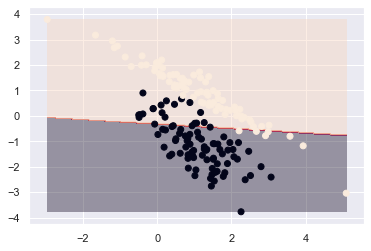

In [10]:
model = Logit(beta = 0,gamma = 0)
y[y == 0] = -1
model.fit(X, y)
plot_decision_boundary(model, X, y)

#### 5. [0.5 points] Plot loss diagram for the model, i.e. show the dependence of the loss function from the gradient descent steps

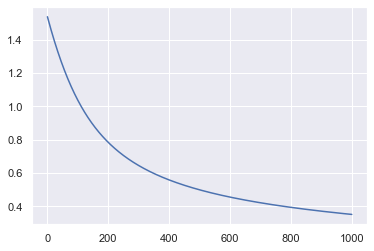

In [11]:
plt.plot(model.loss_history)

## PART 2: Support Vector Machines

#### 6. [1 point] Using the same dataset, train SVM Classifier from Sklearn.
Investigate how different parameters influence the quality of the solution:
+ Try several kernels: Linear, Polynomial, RBF (and others if you wish). Some Kernels have hypermeters: don't forget to try different.
+ Regularization coefficient 

Show how these parameters affect accuracy, roc_auc and f1 score. 
Make plots for the dependencies between metrics and parameters. 
Try to formulate conclusions from the observations. How sensitive are kernels to hyperparameters? How sensitive is a solution to the regularization? Which kernel is prone to overfitting?

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':np.linspace(0.0001, 1, 100), 
              'class_weight' : ['balanced', None], 'estimator__penalty':['l1', 'l2', 'elasticnet']}

In [15]:
accuracy = []
roc_auc = []
f1 = []
for ecw in parameters['class_weight']:
    accuracy_w = []
    roc_auc_w = []
    f1_w = []
    for kernel in parameters['kernel']:
        accuracy_lst = []
        roc_auc_lst = []
        f1_lst = []
        for c in parameters['C']:
            clf =  SVC(kernel=kernel,C=c, class_weight = ecw)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy_lst.append(accuracy_score(y_test,y_pred))
            roc_auc_lst.append(roc_auc_score(y_test,y_pred))
            f1_lst.append(f1_score(y_test,y_pred))
        accuracy_w.append(accuracy_lst)
        roc_auc_w.append(roc_auc_lst)
        f1_w.append(f1_lst)
    accuracy.append(accuracy_w)
    roc_auc.append(roc_auc_w)
    f1.append(f1_w)

Text(0.5, 0.98, 'Accuracy')

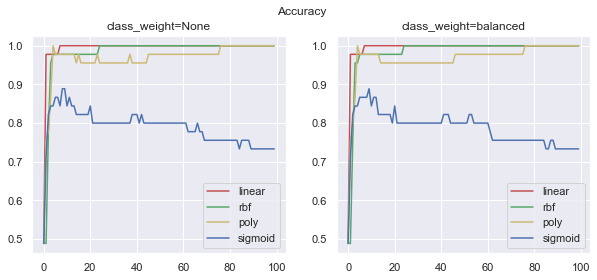

In [16]:
fig, axs = plt.subplots(1, 2,figsize=(10,4))
axs[0].plot(accuracy[0][0], color='r', label = 'linear')
axs[0].plot(accuracy[0][1], color='g', label = 'rbf')
axs[0].plot(accuracy[0][2], color='y', label = 'poly')
axs[0].plot(accuracy[0][3], color='b', label = 'sigmoid')
axs[0].legend()
axs[0].set_title('class_weight=None')
axs[1].plot(accuracy[1][0], color='r', label = 'linear')
axs[1].plot(accuracy[1][1], color='g', label = 'rbf')
axs[1].plot(accuracy[1][2], color='y', label = 'poly')
axs[1].plot(accuracy[1][3], color='b', label = 'sigmoid')
axs[1].legend()
axs[1].set_title('class_weight=balanced')
fig.suptitle('Accuracy')

Вывод: для kernel = sigmoid доля правильно предсказанных значений никогда не приближается к единице, в отличие от других значений kernel. Кроме того, мы видим, что кожффициент C влияет на accuracy приблизительно одинаково для kernal - linear, rbf, poly. При достаточном большой значении результат по accuracy выходит на плато = 1.

Text(0.5, 0.98, 'Roc_auc')

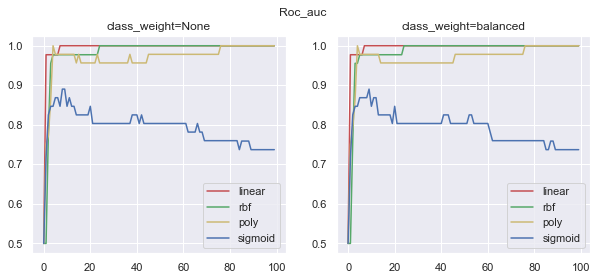

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(10,4))
axs[0].plot(roc_auc[0][0], color='r', label = 'linear')
axs[0].plot(roc_auc[0][1], color='g', label = 'rbf')
axs[0].plot(roc_auc[0][2], color='y', label = 'poly')
axs[0].plot(roc_auc[0][3], color='b', label = 'sigmoid')
axs[0].legend()
axs[0].set_title('class_weight=None')
axs[1].plot(roc_auc[1][0], color='r', label = 'linear')
axs[1].plot(roc_auc[1][1], color='g', label = 'rbf')
axs[1].plot(roc_auc[1][2], color='y', label = 'poly')
axs[1].plot(roc_auc[1][3], color='b', label = 'sigmoid')
axs[1].legend()
axs[1].set_title('class_weight=balanced')
fig.suptitle('Roc_auc')

Text(0.5, 0.98, 'F1')

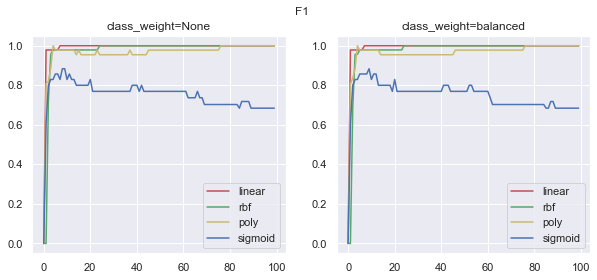

In [18]:
fig, axs = plt.subplots(1, 2,figsize=(10,4))
axs[0].plot(f1[0][0], color='r', label = 'linear')
axs[0].plot(f1[0][1], color='g', label = 'rbf')
axs[0].plot(f1[0][2], color='y', label = 'poly')
axs[0].plot(f1[0][3], color='b', label = 'sigmoid')
axs[0].legend()
axs[0].set_title('class_weight=None')
axs[1].plot(f1[1][0], color='r', label = 'linear')
axs[1].plot(f1[1][1], color='g', label = 'rbf')
axs[1].plot(f1[1][2], color='y', label = 'poly')
axs[1].plot(f1[1][3], color='b', label = 'sigmoid')
axs[1].legend()
axs[1].set_title('class_weight=balanced')
fig.suptitle('F1')

Для f1 и roc_auc_score можно сказать то же самое, что и для accuracy, но для f1_score с ростом параметра C ближе приближается к единице, это можно объяснить самим определением метрики - среднее гармоническое -  относительно других метрик.

## PART 3: Natural Language Processing

#### 7. [2 point] Form the dataset

We are going to form a dataset that we will use in the following tasks for binary and multiclass classification

0. Choose **six** authors that you like (specify who you've chosen) and download the <a href="https://www.kaggle.com/d0rj3228/russian-literature?select=prose">relevant data</a> from **prose** section
1. Build your own dataset for these authors: [0.5 point]
    * divide each text into sentences such that we will have two columns: *sentence* and *target author*, each row will contain one sentence and one target
    * drop sentences where N symbols in a sentence < 15
    * fix random state and randomly choose sentences in the folowing proportion "30k : 15k : 7k : 20k: 40k : 3k" for the authors respectively
    
    sample data may look like:
    
    <center> 
    <table>
        <tr>
            <th> sentence </th>
            <th> author </th>
        </tr> 
        <tr><td> Несколько лет тому назад в одном из своих поместий жил старинный русской барин, Кирила Петрович Троекуров. </td><td> Пушкин </td><td> 
        <tr><td> Уже более недели приезжий господин жил в городе, разъезжая по вечеринкам и обедам и таким образом проводя, как говорится, очень приятно время. </td><td> Гоголь </td><td> 
        <tr><td> ... </td><td> ... </td><td> 
        <tr><td> Я жил недорослем, гоняя голубей и играя в чехарду с дворовыми мальчишками. </td><td> Пушкин </td><td>         
    </table>
</center>
     
2. Preprocess (tokenize and clean) the dataset  [1.5 point]
    * tokenize, remove all stop words (nltk.corpus.stopwords), punctuation (string.punctuation) and numbers
    * convert to lower case and lemmatize the words
    * vectorize words using both **bag of words** and **tf-idf** (use sklearn)
    * observe and describe the difference between vectorized output (what do numbers look like after transformations and what do they represent?)

In [19]:
import requests
from bs4 import BeautifulSoup 

### 1. Собрать датасет

Соберем весь текст определенного писателя из репозитория на гитхабе

In [20]:
def get_all_text(author):
    url_author = 'https://github.com/d0rj/RusLit/tree/main/prose/' + author
    response = requests.get(url_author)
    soup = BeautifulSoup(response.text, 'lxml')
    lst = soup.find_all("a", {"class": "js-navigation-open Link--primary"})
    names = []
    for item in lst:
        names.append(item.text)
    names = names[1:]  # удаляем info.csv
    #names = названия всех произведений, которые есть в репозитории
    our_text = ''
    for name in names:
        url = 'https://github.com/d0rj/RusLit/blob/main/prose/' + author + '/' + name
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        lst = soup.find_all('tr')
        for item in lst:
            our_text += item.text  
    return our_text

In [21]:
Gorky_text = get_all_text('Gorky')

In [22]:
Turgenev_text = get_all_text('Turgenev')

In [23]:
Dostoevsky_text = get_all_text('Dostoevsky')

In [24]:
Bryusov_text = get_all_text('Bryusov')

In [25]:
Herzen_text = get_all_text('Herzen')

In [26]:
Blok_text = get_all_text('Blok')

Разделим все тексты на предложения и удалим предложения, где длина < 15.

In [27]:
lst = Gorky_text.split('.')
Gorky_lst = [lst[i] for i in range(len(lst)) if len(lst[i]) >= 15]

lst = np.array(Turgenev_text.split('.'))
Turgenev_lst = [lst[i] for i in range(len(lst)) if len(lst[i]) >= 15]

lst = np.array(Dostoevsky_text.split('.'))
Dostoevsky_lst = [lst[i] for i in range(len(lst)) if len(lst[i]) >= 15]

lst = np.array(Bryusov_text.split('.'))
Bryusov_lst = [lst[i] for i in range(len(lst)) if len(lst[i]) >= 15]

lst = np.array(Herzen_text.split('.'))
Herzen_lst = [lst[i] for i in range(len(lst)) if len(lst[i]) >= 15]

lst = np.array(Blok_text.split('.'))
Blok_lst = [lst[i] for i in range(len(lst)) if len(lst[i]) >= 15]

Возьмем предложения в нужной пропорции 30k : 15k : 7k : 20k: 40k : 3k

In [28]:
print(len(Gorky_lst)) # часть 40k
print(len(Turgenev_lst)) # часть 20k
print(len(Dostoevsky_lst)) # часть 30k
print(len(Bryusov_lst)) # часть 15k
print(len(Herzen_lst)) # часть 7k
print(len(Blok_lst)) # часть 3k

31700
14242
28747
13020
8703
404


Чтобы сделать датасет побольше, возьмем наименьший датасет за 3k. Тогда из соответственно берем следующее количество предложений:
<br>
Gorky_lst  404*40/3 = 5387
<br>
Dostoevsky_lst 404*30/3 = 4040
<br>
Turgenev_lst 404*20/3=2693
<br>
Bryusov_lst 404*15/3 = 2020
<br>
Herzen_lst 404*7/3 = 943
<br>
Blok_lst 404*3/3 = 404

In [29]:
import random
random.seed(42)
Gorky_lst2 = random.sample(Gorky_lst, 5387)
Dostoevsky_lst2 = random.sample(Dostoevsky_lst, 4040)
Turgenev_lst2 = random.sample(Turgenev_lst, 2693)
Bryusov_lst2 = random.sample(Bryusov_lst, 2020)
Herzen_lst2 = random.sample(Herzen_lst, 943)
Blok_lst2 = random.sample(Blok_lst, 404)

In [30]:
print(len(Gorky_lst2)) # часть 40k
print(len(Turgenev_lst2)) # часть 20k
print(len(Dostoevsky_lst2)) # часть 30k
print(len(Bryusov_lst2)) # часть 15k
print(len(Herzen_lst2)) # часть 7k
print(len(Blok_lst2)) # часть 3k

5387
2693
4040
2020
943
404


Создаем сам датасет

In [31]:
def get_data(lst2, author_name):
    lst2 = np.array(lst2)
    author = np.repeat(author_name, len(lst2))
    lst=[]
    lst.append(lst2)
    lst.append(author)
    return np.transpose(lst)

In [32]:
data = np.concatenate([get_data(Gorky_lst2, 'Gorky'), get_data(Turgenev_lst2, 'Turgenev'),
                get_data(Dostoevsky_lst2, 'Dostoevsky'), get_data(Bryusov_lst2, 'Bryusov'),
               get_data(Herzen_lst2, 'Herzen'), get_data(Blok_lst2, 'Blok')], axis = 0)

In [33]:
data = pd.DataFrame(data,columns = ['sentence', 'author'])
data['sentence'] = data['sentence'].apply(lambda x: x.replace('\n', ''))

Получили нужный датасет (с текстом и их авторами). Датасет не перемешан, но это не повлияет на дальнейшие задания.

In [34]:
data

,sentence,author
0,"Кроме иголок, еще разные железины в ртуть кла...",Gorky
1,"Она опустилась, помолчала, потирая лоб и щё...",Gorky
2,"— А вот мы их устраним, — если сойдемся с вами...",Gorky
3,— Рыбак? А он,Gorky
4,— И облака бегут,Gorky
5,"Ничего не знаю, а — есть обман",Gorky
6,— Верно! — прервал его Рыбин,Gorky
7,"Под полатями висели пучки трав: зверобой, бук...",Gorky
8,Воздух был пропитан острым запахом моря и жирн...,Gorky
9,— Хорошее дело! Молчали долго,Gorky


### 2. Предобработка

* tokenize, remove all stop words (nltk.corpus.stopwords), punctuation (string.punctuation) and numbers
* convert to lower case and lemmatize the words
* vectorize words using both **bag of words** and **tf-idf** (use sklearn)
* observe and describe the difference between vectorized output (what do numbers look like after transformations and what do they represent?)

In [35]:
import string 
import nltk

In [36]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# define word tokenizer
word_tokenizer = nltk.WordPunctTokenizer()

In [38]:
#воспользуемся функцией с семинара, немного изменив ее
dates = [str(x) for x in np.arange(0, 10000)]
def process_data(data):
    texts = []
    for item in data['sentence']:
        text_lower = item.lower()
        tokens = word_tokenizer.tokenize(text_lower) # splits the text into tokens (words)
        # remove punct and stop words from tokens
        tokens = [word for word in tokens if (word not in string.punctuation and word != '—' and word != '–' and word != '-' and word not in stop_words and word not in dates)]
        texts.append(tokens) # collect the text tokens
    return texts

In [39]:
texts = process_data(data)

In [40]:
texts[:5]

[['кроме',
  'иголок',
  'разные',
  'железины',
  'ртуть',
  'кладут',
  'разные',
  'звуки',
  'иголка',
  'своему',
  'гвоздь',
  'своему',
  'выходит',
  'этакая',
  'чертовская',
  'музыка'],
 ['опустилась',
  'помолчала',
  'потирая',
  'лоб',
  'щёки',
  'спросила',
  'дедушка',
  'ставил',
  'угол',
  'вообще',
  'крикнула',
  'ударив',
  'дважды',
  'ладонью',
  'столу'],
 ['устраним', 'сойдемся', 'вами', 'пообещал', 'петунников'],
 ['рыбак'],
 ['облака', 'бегут']]

In [41]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [42]:
morph_texts = []
for sent in texts:
    morph_texts.append([morph.parse(word)[0].normal_form for word in sent ])

In [43]:
morph_texts[:5]

[['кроме',
  'иголка',
  'разный',
  'железина',
  'ртуть',
  'класть',
  'разный',
  'звук',
  'иголка',
  'свой',
  'гвоздь',
  'свой',
  'выходить',
  'этакий',
  'чертовский',
  'музыка'],
 ['опуститься',
  'помолчать',
  'потирать',
  'лоб',
  'щека',
  'спросить',
  'дедушка',
  'ставить',
  'угол',
  'вообще',
  'крикнуть',
  'ударить',
  'дважды',
  'ладонь',
  'стол'],
 ['устранимый', 'сойтись', 'вы', 'пообещать', 'петунник'],
 ['рыбак'],
 ['облако', 'бежать']]

* vectorize words using both bag of words and tf-idf (use sklearn)

In [44]:
data['preprocessed'] = morph_texts
data.head()

,sentence,author,preprocessed
0,"Кроме иголок, еще разные железины в ртуть кла...",Gorky,"[кроме, иголка, разный, железина, ртуть, класт..."
1,"Она опустилась, помолчала, потирая лоб и щё...",Gorky,"[опуститься, помолчать, потирать, лоб, щека, с..."
2,"— А вот мы их устраним, — если сойдемся с вами...",Gorky,"[устранимый, сойтись, вы, пообещать, петунник]"
3,— Рыбак? А он,Gorky,[рыбак]
4,— И облака бегут,Gorky,"[облако, бежать]"


In [45]:
data['preprocessed_texts'] = data['preprocessed'].apply(lambda x: ' '.join(x))

In [46]:
data

,sentence,author,preprocessed,preprocessed_texts
0,"Кроме иголок, еще разные железины в ртуть кла...",Gorky,"[кроме, иголка, разный, железина, ртуть, класт...",кроме иголка разный железина ртуть класть разн...
1,"Она опустилась, помолчала, потирая лоб и щё...",Gorky,"[опуститься, помолчать, потирать, лоб, щека, с...",опуститься помолчать потирать лоб щека спросит...
2,"— А вот мы их устраним, — если сойдемся с вами...",Gorky,"[устранимый, сойтись, вы, пообещать, петунник]",устранимый сойтись вы пообещать петунник
3,— Рыбак? А он,Gorky,[рыбак],рыбак
4,— И облака бегут,Gorky,"[облако, бежать]",облако бежать
5,"Ничего не знаю, а — есть обман",Gorky,"[знать, обман]",знать обман
6,— Верно! — прервал его Рыбин,Gorky,"[верно, прервать, рыбина]",верно прервать рыбина
7,"Под полатями висели пучки трав: зверобой, бук...",Gorky,"[полати, висеть, пучок, трава, зверобой, букви...",полати висеть пучок трава зверобой буквица мед...
8,Воздух был пропитан острым запахом моря и жирн...,Gorky,"[воздух, пропитать, острый, запах, море, жирны...",воздух пропитать острый запах море жирный испа...
9,— Хорошее дело! Молчали долго,Gorky,"[хороший, дело, молчать, долго]",хороший дело молчать долго


In [47]:
data['preprocessed_texts']

0        кроме иголка разный железина ртуть класть разн...
1        опуститься помолчать потирать лоб щека спросит...
2                 устранимый сойтись вы пообещать петунник
3                                                    рыбак
4                                            облако бежать
5                                              знать обман
6                                    верно прервать рыбина
7        полати висеть пучок трава зверобой буквица мед...
8        воздух пропитать острый запах море жирный испа...
9                               хороший дело молчать долго
10       пропиться ?— окончательно пропиться мать !— эк...
11       луна освещать сухой потрескаться губа заострит...
12       лицо весь видеть нехорошо ты житься сказать фо...
13        смотреть посчитать алёшка отворить дверь кричать
14       бог видеть человек дать ослепнуть святой гляде...
15       сила который жизнь крепко держать держать земл...
16                                захотеть достать доста

Bag of words

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 50)
vectorizer.fit(data['preprocessed_texts'].values.tolist())
X = vectorizer.transform(data['preprocessed_texts'])

tf-idf

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
vectorizer2 = TfidfVectorizer(max_features = 100) # select the top 100 words
vectorizer2.fit(data['preprocessed_texts'])
X2 = vectorizer2.transform(data['preprocessed_texts'])

##### Теперь у нас есть матрицы для каждого предложения, которые показывают частоту встречаемости слов в предложениях. К ним можно применять последующие алгоритмы классфикации. 

In [50]:
print(vectorizer.get_feature_names()[:20])
print(vectorizer2.get_feature_names()[:20])

['быть', 'ваш', 'весь', 'видеть', 'время', 'всё', 'глаз', 'говорить', 'год', 'голова', 'господин', 'дело', 'день', 'дом', 'друг', 'другой', 'думать', 'душа', 'жизнь', 'жить']
['бог', 'быть', 'ваш', 'весь', 'взять', 'видеть', 'время', 'всякий', 'всё', 'выйти', 'глаз', 'глядеть', 'говорить', 'год', 'голова', 'голос', 'город', 'господин', 'дать', 'дверь']


##### Получается, что есть ставить разные параметры для max_features, то получаем и разные матрицы, так как списки популярных слов немного различаются

###  Binary classification

#### 8. [2 point] Train model using Logistic Regression (your own) and SVC (SVM can be taken from sklearn) 

##### 1. [1 point]
* choose *two* authors from the dataset that you have formed in the previous task
* check the balance of the classes
* divide the data into train and test samples with 3/4 split rate (don't forget to fix the random state)
* train the models using cross validation
* plot confusion matrix for train and test samples
* compute all possible and relevant metrics for test sample (useful to check the seminars 5 and 6, use sklearn) 
* make conclusions about the performance of your models

##### 2. [1 point]
* using GridSearchCV - find the best parameters for the models (by ROC_AUC score)
* make several plots to address the dependence between ROC_AUC score and parameters
* make conclusions about the models

**HINT:** In the task 8.2 you should analyze models for binary classification task. How do you think the AUC_ROC should be high? Is the 0.6 enough for us?

### 1.

In [51]:
from sklearn.metrics import *

In [52]:
data2 = data[(data['author'] =='Herzen') | (data['author'] == 'Blok')]

In [53]:
balance_coef = data[data['author'] =='Herzen'].shape[0]/data[data['author'] =='Blok'].shape[0]
print(balance_coef)
print(1/balance_coef)

2.3341584158415842
0.42841993637327674


In [54]:
data2.head()

,sentence,author,preprocessed,preprocessed_texts
14140,"- Эки дела! - сказал столоначальник, на кот...",Herzen,"[эки, дело, сказать, столоначальник, который, ...",эки дело сказать столоначальник который расска...
14141,"Мало знакомая с врачебной наукой, она не тол...",Herzen,"[мало, знакомый, врачебный, наука, неограничив...",мало знакомый врачебный наука неограничивать р...
14142,"При сем не излишним считаю предупредить вас,...",Herzen,"[сем, излишний, считать, предупредить, менее, ...",сем излишний считать предупредить менее литера...
14143,"Так достигли господского дома, тутдожидались ...",Herzen,"[достигнуть, господский, дом, тутдожидаться, с...",достигнуть господский дом тутдожидаться священ...
14144,"По счастию, в Европе нравы и долгое развитие ...",Herzen,"[счастие, европа, нрав, долгий, развитие, восп...",счастие европа нрав долгий развитие восполнять...


In [55]:
train_texts, test_texts, train_author, test_author = train_test_split(data2['preprocessed_texts'], data2['author'], test_size=0.25, random_state=42)

Видно, что датасет не сильно несбалансированный, но тем не менее отчетливо наблюдается преобладание количества строк Горького

Будем использовать tf-idf, так как особой разницы в результате нет (убедились в предыдцщем задании). В основном все зависит от параметра max feature.

In [56]:
def show_results(test_y, pred, proba):
    print("Precision: {0:6.2f}".format(precision_score(test_y, pred, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(test_y, pred, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(test_y, pred, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(test_y, pred)))
    print("ROC-AUC  =  {0:6.2f}".format(roc_auc_score(test_y, proba)))
    print('\n')
    labels = ['negative','positive']

    #classification_report
    sns.heatmap(data=confusion_matrix(test_y, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix ")
    plt.show()

In [57]:
vectorizer = TfidfVectorizer(max_features = 100) 
vectorizer.fit(train_texts)
train_X = vectorizer.transform(train_texts)
test_X = vectorizer.transform(test_texts)

In [58]:
train_y = [-1 if x == 'Herzen'  else 1 for x in train_author]
test_y = [-1 if x == 'Herzen'  else 1 for x in test_author]

In [59]:
train_X = np.array(train_X.todense())
test_X = np.array(test_X.todense())
train_y = np.array(train_y)
test_y = np.array(test_y)

In [60]:
print(train_X.shape)
print(train_y.shape)

(1010, 100)
(1010,)


In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'beta': np.array([0, 0.5, 1]), 'gamma' : np.array([0, 0.5, 1]),\
              'max_iter': np.array([1000, 1500, 1700])}

clf = GridSearchCV(Logit(), parameters, scoring='f1', cv=4)

clf.fit(train_X, train_y)

pred = clf.predict(test_X)
proba  = clf.predict_proba(test_X)
print('Best parameters: ', clf.best_params_)

Best parameters:  {'beta': 0.0, 'gamma': 0.0, 'max_iter': 1500}


Precision:   0.46
Recall:   0.48
F1-measure:   0.46
Accuracy:   0.66
ROC-AUC  =    0.52




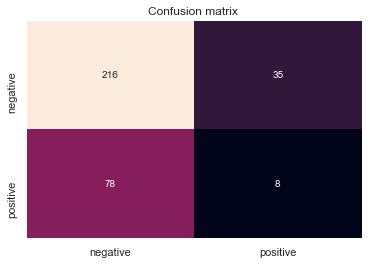

In [63]:
show_results(test_y, pred, proba)

##### SVC

In [64]:
from sklearn.svm import SVC

In [65]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

svr = SVC(probability=True, verbose = False)
clf = GridSearchCV(svr, parameters, scoring = 'f1', verbose=2)
clf.fit(train_X, train_y)
print(clf.best_params_)
pred = clf.predict(test_X)
proba  = clf.predict_proba(test_X)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.7s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.6s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.6s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.6s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.6s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.3s
[CV] END ...............................C=0.001

[CV] END ...............................C=100, kernel=linear; total time=   4.4s
[CV] END ...............................C=100, kernel=linear; total time=   3.1s
[CV] END ...............................C=100, kernel=linear; total time=   5.3s
[CV] END ...............................C=100, kernel=linear; total time=   4.4s
[CV] END ..................................C=100, kernel=rbf; total time=   1.0s
[CV] END ..................................C=100, kernel=rbf; total time=   1.1s
[CV] END ..................................C=100, kernel=rbf; total time=   1.0s
[CV] END ..................................C=100, kernel=rbf; total time=   0.9s
[CV] END ..................................C=100, kernel=rbf; total time=   0.9s
[CV] END .................................C=100, kernel=poly; total time=   0.4s
[CV] END .................................C=100, kernel=poly; total time=   0.5s
[CV] END .................................C=100, kernel=poly; total time=   0.5s
[CV] END ...................

Precision:   0.59
Recall:   0.56
F1-measure:   0.56
Accuracy:   0.72
ROC-AUC  =    0.67




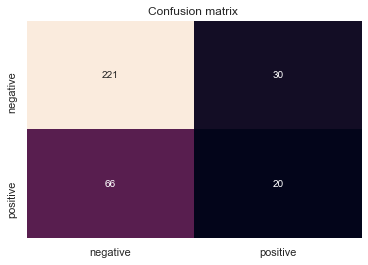

In [66]:
show_results(test_y, pred, proba[:,1])

#### В итоге получилось, что модель Logit не сильно уступает встроенной svc. Можно сказать, что основные метрики сопоставимы, как и confusion matrices. Но все-таки SVC показывает немного более хороший результат.

### 2.

In [67]:
parameters = {'beta': np.array([0, 0.5, 1]), 'gamma' : np.array([0, 0.5, 1]),\
              'max_iter': np.array([700, 1000, 1500, 1700])}
clf = GridSearchCV(Logit(), parameters, scoring='roc_auc')
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
proba  = clf.predict_proba(test_X)
print('Best parameters: ', clf.best_params_)

Best parameters:  {'beta': 1.0, 'gamma': 0.0, 'max_iter': 1000}


In [68]:
roc_auc_score_lst = []
for max_iter in np.array([700, 1000, 1500, 1700]):
    model = Logit(beta = 1, gamma = 0, max_iter = max_iter)
    model.fit(train_X, train_y)
    proba  = model.predict_proba(test_X)
    roc_auc_score_lst.append(roc_auc_score(test_y, proba))

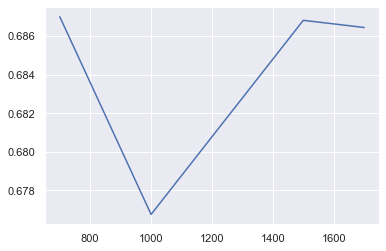

In [69]:
plt.plot(np.array([700, 1000, 1500, 1700]), roc_auc_score_lst)

In [70]:
roc_auc_score_lst = []
for gamma in np.array([0, 0.3, 0.5, 0.7, 1]):
    model = Logit(beta = 1, gamma = gamma, max_iter = 1000)
    model.fit(train_X, train_y)
    proba  = model.predict_proba(test_X)
    roc_auc_score_lst.append(roc_auc_score(test_y, proba))

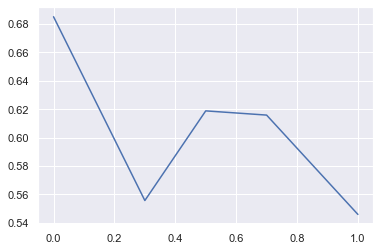

In [71]:
plt.plot(np.array([0, 0.3, 0.5, 0.7, 1]), roc_auc_score_lst)

In [72]:
roc_auc_score_lst = []
for beta in np.array([0.7, 1, 1.3, 1.5, 1.7]):
    model = Logit(beta = beta, gamma = 0, max_iter = 1000)
    model.fit(train_X, train_y)
    proba  = model.predict_proba(test_X)
    roc_auc_score_lst.append(roc_auc_score(test_y, proba))

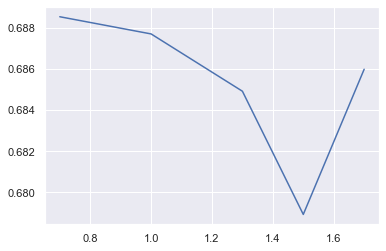

In [73]:
plt.plot(np.array([0.7, 1, 1.3, 1.5, 1.7]), roc_auc_score_lst)

Roc auc score везде приблизительно около 0.7 в лучших случаях.

In [74]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(SVC(probability=True, verbose = False), parameters, scoring='roc_auc', verbose = 2)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
proba  = clf.predict_proba(test_X)
print('Best parameters: ', clf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END .............................C=0.001, kernel=linear; total time=   0.2s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.5s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.7s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.6s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.4s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.3s
[CV] END ...............................C=0.001

[CV] END ...............................C=100, kernel=linear; total time=   3.9s
[CV] END ...............................C=100, kernel=linear; total time=   2.9s
[CV] END ...............................C=100, kernel=linear; total time=   3.4s
[CV] END ...............................C=100, kernel=linear; total time=   4.5s
[CV] END ..................................C=100, kernel=rbf; total time=   0.7s
[CV] END ..................................C=100, kernel=rbf; total time=   0.7s
[CV] END ..................................C=100, kernel=rbf; total time=   1.1s
[CV] END ..................................C=100, kernel=rbf; total time=   0.8s
[CV] END ..................................C=100, kernel=rbf; total time=   0.7s
[CV] END .................................C=100, kernel=poly; total time=   0.5s
[CV] END .................................C=100, kernel=poly; total time=   0.5s
[CV] END .................................C=100, kernel=poly; total time=   0.5s
[CV] END ...................

Лучшие параметры получились C = 0.1 и linear kernel

In [75]:
roc_auc_score_lst = []
for c in np.array([0.001, 0.01, 0.1, 1, 10, 100]):
    model = SVC(C = c, kernel = 'linear')
    model.fit(train_X, train_y)
    proba  = model.decision_function(test_X)
    roc_auc_score_lst.append(roc_auc_score(test_y, proba))

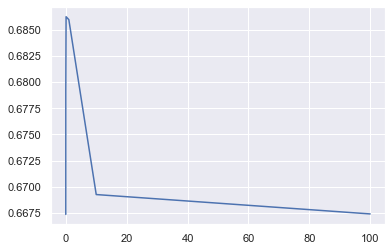

In [76]:
plt.plot(np.array([0.001, 0.01, 0.1, 1, 10, 100]), roc_auc_score_lst)

#### Что можно сказать о моделях: Кажется, что roc_auc_score около 0.7 это вполне достаточно для оценки, так как обработка текстов была не очень длинной и тяжелой, а количество текста не очень большое. Тем не менее, результат довольно хороший

#### 9. [1 point] Analysing ROC_AUC

It is possible to control the proportion of statistical errors of different types using different thresholds for choosing a class. Plot ROC curves for Logistic Regression and SVC, show the threshold on ROC curve plots. Choose such a threshold that your models have no more than 30% of false positive errors rate 

In [77]:
import sklearn 
from sklearn import metrics

In [78]:
parameters = {'beta': np.array([0, 0.5, 1]), 'gamma' : np.array([0, 0.5, 1]),\
              'max_iter': np.array([1000, 1500, 1700])}
clf1 = GridSearchCV(Logit(), parameters, scoring='f1', cv=4)
clf1.fit(train_X, train_y)
pred1 = clf1.predict(test_X)
proba1  = clf1.predict_proba(test_X)

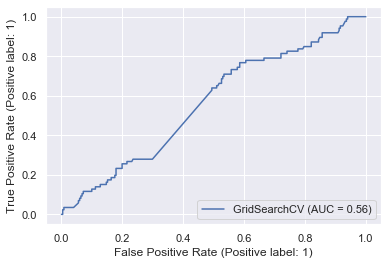

In [79]:
metrics.plot_roc_curve(clf1, test_X, test_y)
plt.show()  

In [80]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf2 = GridSearchCV(SVC(probability=True, verbose = False), parameters, scoring='roc_auc', verbose = 0)
clf2.fit(train_X, train_y)
pred2 = clf2.predict(test_X)
proba2  = clf2.predict_proba(test_X)

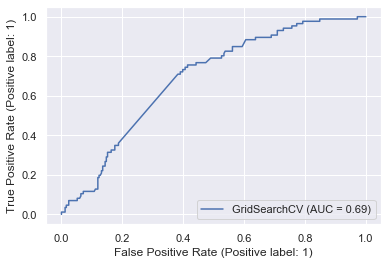

In [81]:
metrics.plot_roc_curve(clf2, test_X, test_y)  
plt.show()

Мы должны выбрать такие точки на кривых, где FPR не более 30%

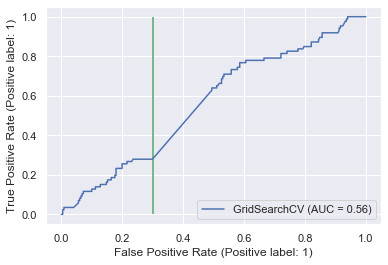

In [82]:
metrics.plot_roc_curve(clf1, test_X, test_y)
plt.vlines(0.3, 0, 1, color = 'g', label = 'treshold')
plt.show()  

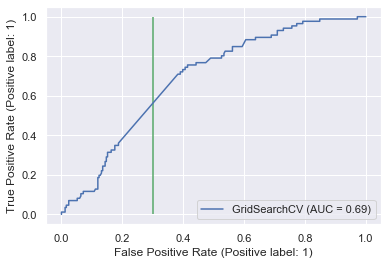

In [83]:
metrics.plot_roc_curve(clf2, test_X, test_y)
plt.vlines(0.3, 0, 1, color = 'g', label = 'treshold')
plt.show()  

### Multiclass logit

#### 10. [1 point] Take the One-VS-Rest classifier (use sklearn) and apply to Logit model (one you've made in the 4th task) in order to get multiclass linear classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html">OneVsRestClassifier</a>

* use the whole dataset with 6 authors
* divide the data into train and test samples with 3/4 split rate
* train the model using cross validation
* plot confusion matrix for train and test samples
* compute all possible and relevant metrics for test sample (use sklearn)
* using GridSearchCV - find the best parameters for the models (by averaged ROC_AUC score). **HINT:** Do not forget about set jobs=-1 in the GridSearchCV init to speed up calculations.
* make conclusions about the model

In [84]:
data['author'].value_counts() #полный датасет

Gorky         5387
Dostoevsky    4040
Turgenev      2693
Bryusov       2020
Herzen         943
Blok           404
Name: author, dtype: int64

In [85]:
train_texts, test_texts, train_y, test_y = train_test_split(data['preprocessed_texts'], data['author'], test_size=0.25, random_state=42)

In [86]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [87]:
vectorizer = TfidfVectorizer(max_features = 100)
vectorizer.fit(train_texts)
train_X = vectorizer.transform(train_texts)
test_X  = vectorizer.transform(test_texts)

In [88]:
train_y = np.array(train_y)
test_y = np.array(test_y)
train_y_ = np.zeros(train_y.shape)
test_y_ = np.zeros(test_y.shape)

In [89]:
data['author'].value_counts()

Gorky         5387
Dostoevsky    4040
Turgenev      2693
Bryusov       2020
Herzen         943
Blok           404
Name: author, dtype: int64

In [90]:
train_y_[train_y == 'Gorky'] = 0
train_y_[train_y == 'Dostoevsky'] = 1
train_y_[train_y == 'Turgenev'] = 2
train_y_[train_y == 'Bryusov'] = 3
train_y_[train_y == 'Herzen'] = 4
train_y_[train_y == 'Blok'] = 5

test_y_[test_y == 'Gorky'] = 0
test_y_[test_y == 'Dostoevsky'] = 1
test_y_[test_y == 'Turgenev'] = 2
test_y_[test_y == 'Bryusov'] = 3
test_y_[test_y == 'Herzen'] = 4
test_y_[test_y == 'Blok'] = 5

In [91]:
train_X = np.array(train_X.todense())
test_X = np.array(test_X.todense())

In [92]:
from sklearn.linear_model import LogisticRegression

In [115]:
parameters = {'estimator__gamma': [0, 0.1, 1], 'estimator__beta': [0, 0.1, 1]}

my_scorer = make_scorer(roc_auc_score, greater_is_better=True, multi_class = 'ovr')


#svr = OneVsRestClassifier(LogisticRegression(verbose = False))
svr = OneVsRestClassifier(Logit(max_iter = 500))
clf = GridSearchCV(svr, parameters, scoring=my_scorer, n_jobs = -1)
clf.fit(train_X, train_y_)
proba = clf.decision_function(test_X)
predict = clf.predict(test_X)
print('OneVsRest Strategy')
print('Best parameters: ', clf.best_params_)

OneVsRest Strategy
Best parameters:  {'estimator__beta': 0, 'estimator__gamma': 0}


In [116]:
model = OneVsRestClassifier(Logit(beta = 0, gamma = 0, max_iter = 500))
model.fit(train_X, train_y_)
proba = model.decision_function(test_X)
predict = model.predict(test_X)

Precision:   0.17
Recall:   0.16
F1-measure:   0.13
Accuracy:   0.17




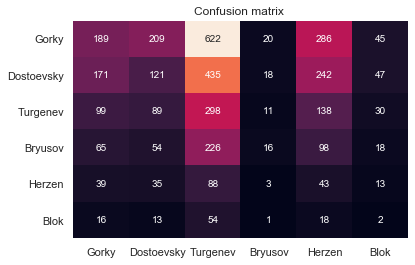

In [128]:
print("Precision: {0:6.2f}".format(precision_score(test_y_, predict, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test_y_, predict, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test_y_, predict, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(test_y_, predict,)))
print('\n')
labels = ['Gorky','Dostoevsky', 'Turgenev', 'Bryusov', 'Herzen', 'Blok' ]


#classification_report
sns.heatmap(data=confusion_matrix(test_y_, predict), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix ")
plt.show()

Видно, что результат получился не очень хороший. Скорее всего это связано с тем, что датасет не сбалансированный. Мы видим, что Горький почти всегда угадывается нашей моделью, скорее всего потому, что его очень много а данных. С другой стороны, очень много данных предсказано неверно, и очень низкие значения метрик. Это говорит о том, что модель не очень хорошая.


In [130]:
parameters = {'estimator__C': [0.01, 0.1, 1], \
              'estimator__class_weight' : ['balanced', None]}

my_scorer = make_scorer(roc_auc_score, greater_is_better=True, multi_class = 'ovr')


svr = OneVsRestClassifier(LogisticRegression(verbose = False))
clf = GridSearchCV(svr, parameters, scoring=my_scorer, n_jobs = -1)
clf.fit(train_X, train_y_)
proba = clf.decision_function(test_X)
predict = clf.predict(test_X)
print('OneVsRest Strategy')
print('Best parameters: ', clf.best_params_)

OneVsRest Strategy
Best parameters:  {'estimator__C': 0.01, 'estimator__class_weight': 'balanced'}


In [131]:
model = OneVsRestClassifier(LogisticRegression(C = 0.01, class_weight = 'balanced'))
model.fit(train_X, train_y_)
proba = model.predict_proba(test_X)
predict = model.predict(test_X)

Precision:   0.28
Recall:   0.28
F1-measure:   0.23
Accuracy:   0.26




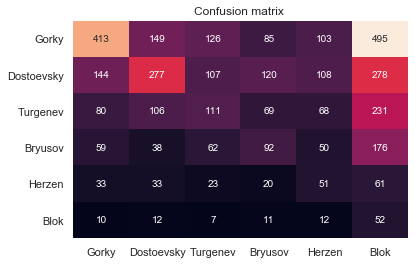

In [132]:
print("Precision: {0:6.2f}".format(precision_score(test_y_, predict, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test_y_, predict, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test_y_, predict, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(test_y_, predict,)))
print('\n')
labels = ['Gorky','Dostoevsky', 'Turgenev', 'Bryusov', 'Herzen', 'Blok' ]


#classification_report
sns.heatmap(data=confusion_matrix(test_y_, predict), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix ")
plt.show()

Как мы видим, для встроенной регрессии, результат уже получше, но тоже не очень хороший. Скорее всего, опять же, проблема в несбалансированности.